# **Building a Tourist Place Recommendation System**

## **Packages**

In [1]:
import numpy as np # for numerical computations
import pandas as pd # for data analysis and manipulation

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for modelling
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# **Indonesian Tourism Destination Dataset**

Dataset Source : https://kaggle.com/aprabowo/indonesia-tourism-destination

In [2]:
user = pd.read_csv ('https://raw.githubusercontent.com/deltadv/JelaJava/main/Machine%20Learning/Datasets/user.csv')
place = pd.read_csv ('https://raw.githubusercontent.com/deltadv/JelaJava/main/Machine%20Learning/Datasets/tourism_with_id.csv')
rating = pd.read_csv ('https://raw.githubusercontent.com/deltadv/JelaJava/main/Machine%20Learning/Datasets/tourism_rating.csv')

In [3]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [4]:
place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [5]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [6]:
df_data = pd.merge(rating, user, on='User_Id')
df_data

,User_Id,Place_Id,Place_Ratings,Location,Age
0,1,179,3,"Semarang, Jawa Tengah",20
1,1,344,2,"Semarang, Jawa Tengah",20
2,1,5,5,"Semarang, Jawa Tengah",20
3,1,373,3,"Semarang, Jawa Tengah",20
4,1,101,4,"Semarang, Jawa Tengah",20
...,...,...,...,...,...
9995,300,425,2,"Ponorogo, Jawa Timur",26
9996,300,64,4,"Ponorogo, Jawa Timur",26
9997,300,311,3,"Ponorogo, Jawa Timur",26
9998,300,279,4,"Ponorogo, Jawa Timur",26


**Displaying information of dataset**

In [7]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [8]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [9]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


### **Data Visualization**

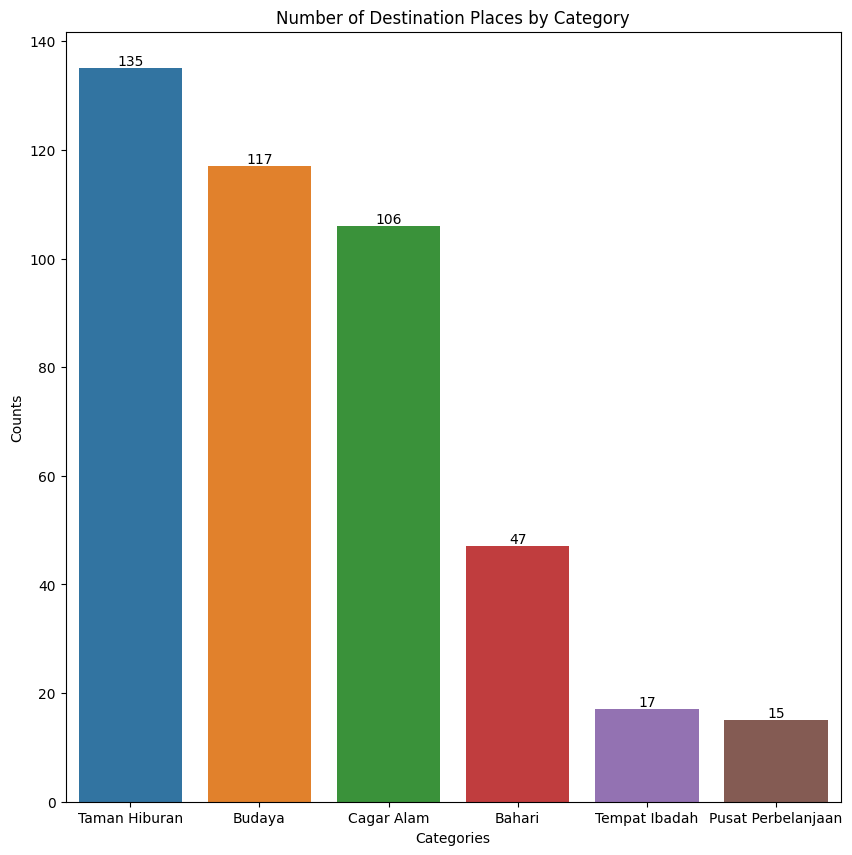

In [10]:
plt.figure(figsize=(10, 10))

# Accumulating the values of each category using cumcount()
place['Count_Category'] = place.groupby('Category').cumcount()+1

# Creating a bar plot using seaborn
sorted_data = place.sort_values(["Count_Category"], ascending=False)
ax = sns.countplot(x='Category', data=sorted_data)

# Adding title and axis labels to the bar plot using seaborn
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Number of Destination Places by Category')

# Displaying the count above each bar.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Display the plot
plt.show()

In [11]:
# Calculating the total number of destinations in a city using the agg count function.
count_city = place.groupby('City')['Place_Name'].agg(['count'])

# Convert the result of aggregation into a pandas DataFrame
df_city_count = pd.DataFrame(count_city).reset_index()

# Display the resulting DataFrame
print(df_city_count)

         City  count
0     Bandung    124
1     Jakarta     84
2    Semarang     57
3    Surabaya     46
4  Yogyakarta    126


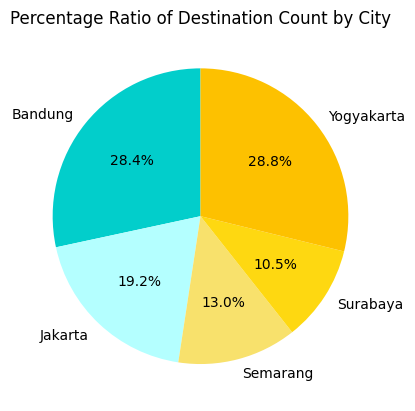

In [12]:
plt.pie(df_city_count['count'],
        labels = df_city_count['City'],
        colors=['#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Percentage Ratio of Destination Count by City')

plt.show()

## **Data Preprocessing**

In [13]:
place.drop(['Time_Minutes','Coordinate','Lat','Long','Unnamed: 11','Unnamed: 12'],axis=1,inplace=True)
place

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Count_Category
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,1
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,2
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,3
...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,117
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,133
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,134
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,135


In [14]:
# Encode categorical features
df_data['User_Id'] = df_data['User_Id'].astype('category').cat.codes
df_data['Place_Id'] = df_data['Place_Id'].astype('category').cat.codes

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data[['User_Id', 'Place_Id']], df_data['Place_Ratings'], test_size=0.2, random_state=42)



```
# This is formatted as code
```

# **Data Modelling**

In [17]:
embedding_size = 32

# Define input layers
user_input = tf.keras.Input(shape=(1,))
place_input = tf.keras.Input(shape=(1,))

# Define embedding layers
user_embedding = tf.keras.layers.Embedding(num_users, embedding_size)(user_input)
user_embedding = tf.keras.layers.Dropout(0.2)(user_embedding)  # Dropout regularization
place_embedding = tf.keras.layers.Embedding(num_places, embedding_size)(place_input)
place_embedding = tf.keras.layers.Dropout(0.2)(place_embedding)  # Dropout regularization

# Flatten embedding layers
user_embedding = tf.keras.layers.Flatten()(user_embedding)
place_embedding = tf.keras.layers.Flatten()(place_embedding)

# Compute dot product of user and place embeddings
dot_product = tf.keras.layers.Dot(axes=1)([user_embedding, place_embedding])

In [18]:
model = tf.keras.Model(inputs=[user_input, place_input], outputs=dot_product)

# Compile model with appropriate loss function and optimizer
learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train model
epochs = 100
batch_size = 32

history = model.fit(
    [X_train['User_Id'].values, X_train['Place_Id'].values],
    y_train.values,
    validation_data=([X_test['User_Id'].values, X_test['Place_Id'].values], y_test.values),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 11.3664 - val_loss: 11.0652
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 11.3030 - val_loss: 10.9857
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 10.9385 - val_loss: 10.3362
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 9.5136 - val_loss: 8.3243
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 6.8805 - val_loss: 5.5707
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 4.3347 - val_loss: 3.4930
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 2.8178 - val_loss: 2.4929
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 2.2318 - val_loss: 2.1329
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 2.0213 - val_loss: 2.0302
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 1.9737 - 

### **Metrics Evaluation Data Training dan Testing**

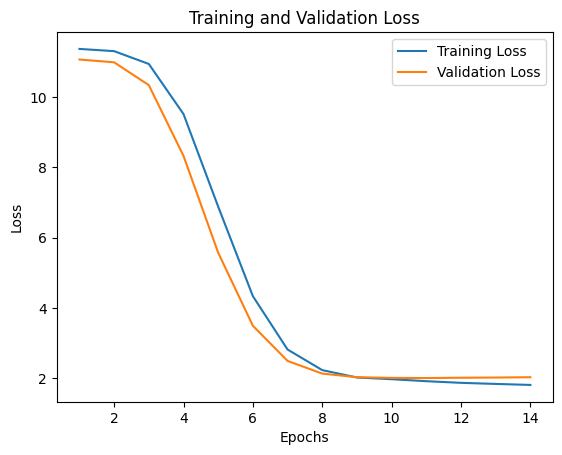

In [19]:
# Retrieve loss history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()